In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.stats import norm
from operator import itemgetter
from sklearn.model_selection import cross_val_score
import seaborn as sns


In [2]:
dfHistorical = pd.read_csv('mvps.csv')
dfCurrent = pd.read_csv('2024.csv')


In [3]:
df_new = dfCurrent.drop(dfCurrent[dfCurrent['GS'] < 40].index)
df_new = df_new.dropna()
print(df_new)

              Player Pos  Age   Tm  Team Wins  Overall Seed   G  GS    MP  \
0         Saddiq Bey  SF   24  ATL         24            21  54  42  32.5   
15   Dejounte Murray  SG   27  ATL         24            21  52  52  35.0   
17        Trae Young  PG   25  ATL         24            21  50  50  36.5   
19      Jaylen Brown  SF   27  BOS         43             1  50  50  33.4   
22      Jrue Holiday  PG   33  BOS         43             1  50  50  33.3   
..               ...  ..  ...  ...        ...           ...  ..  ..   ...   
515  Lauri Markkanen  PF   26  UTA         26            20  46  46  32.8   
522      Deni Avdija  SF   23  WAS          9            29  54  54  28.2   
532       Tyus Jones  PG   27  WAS          9            29  54  54  29.0   
534       Kyle Kuzma  PF   28  WAS          9            29  52  52  31.7   
536     Jordan Poole  SG   24  WAS          9            29  52  52  29.2   

      FG  ...  TOV%  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM  BPM  VORP  
0 

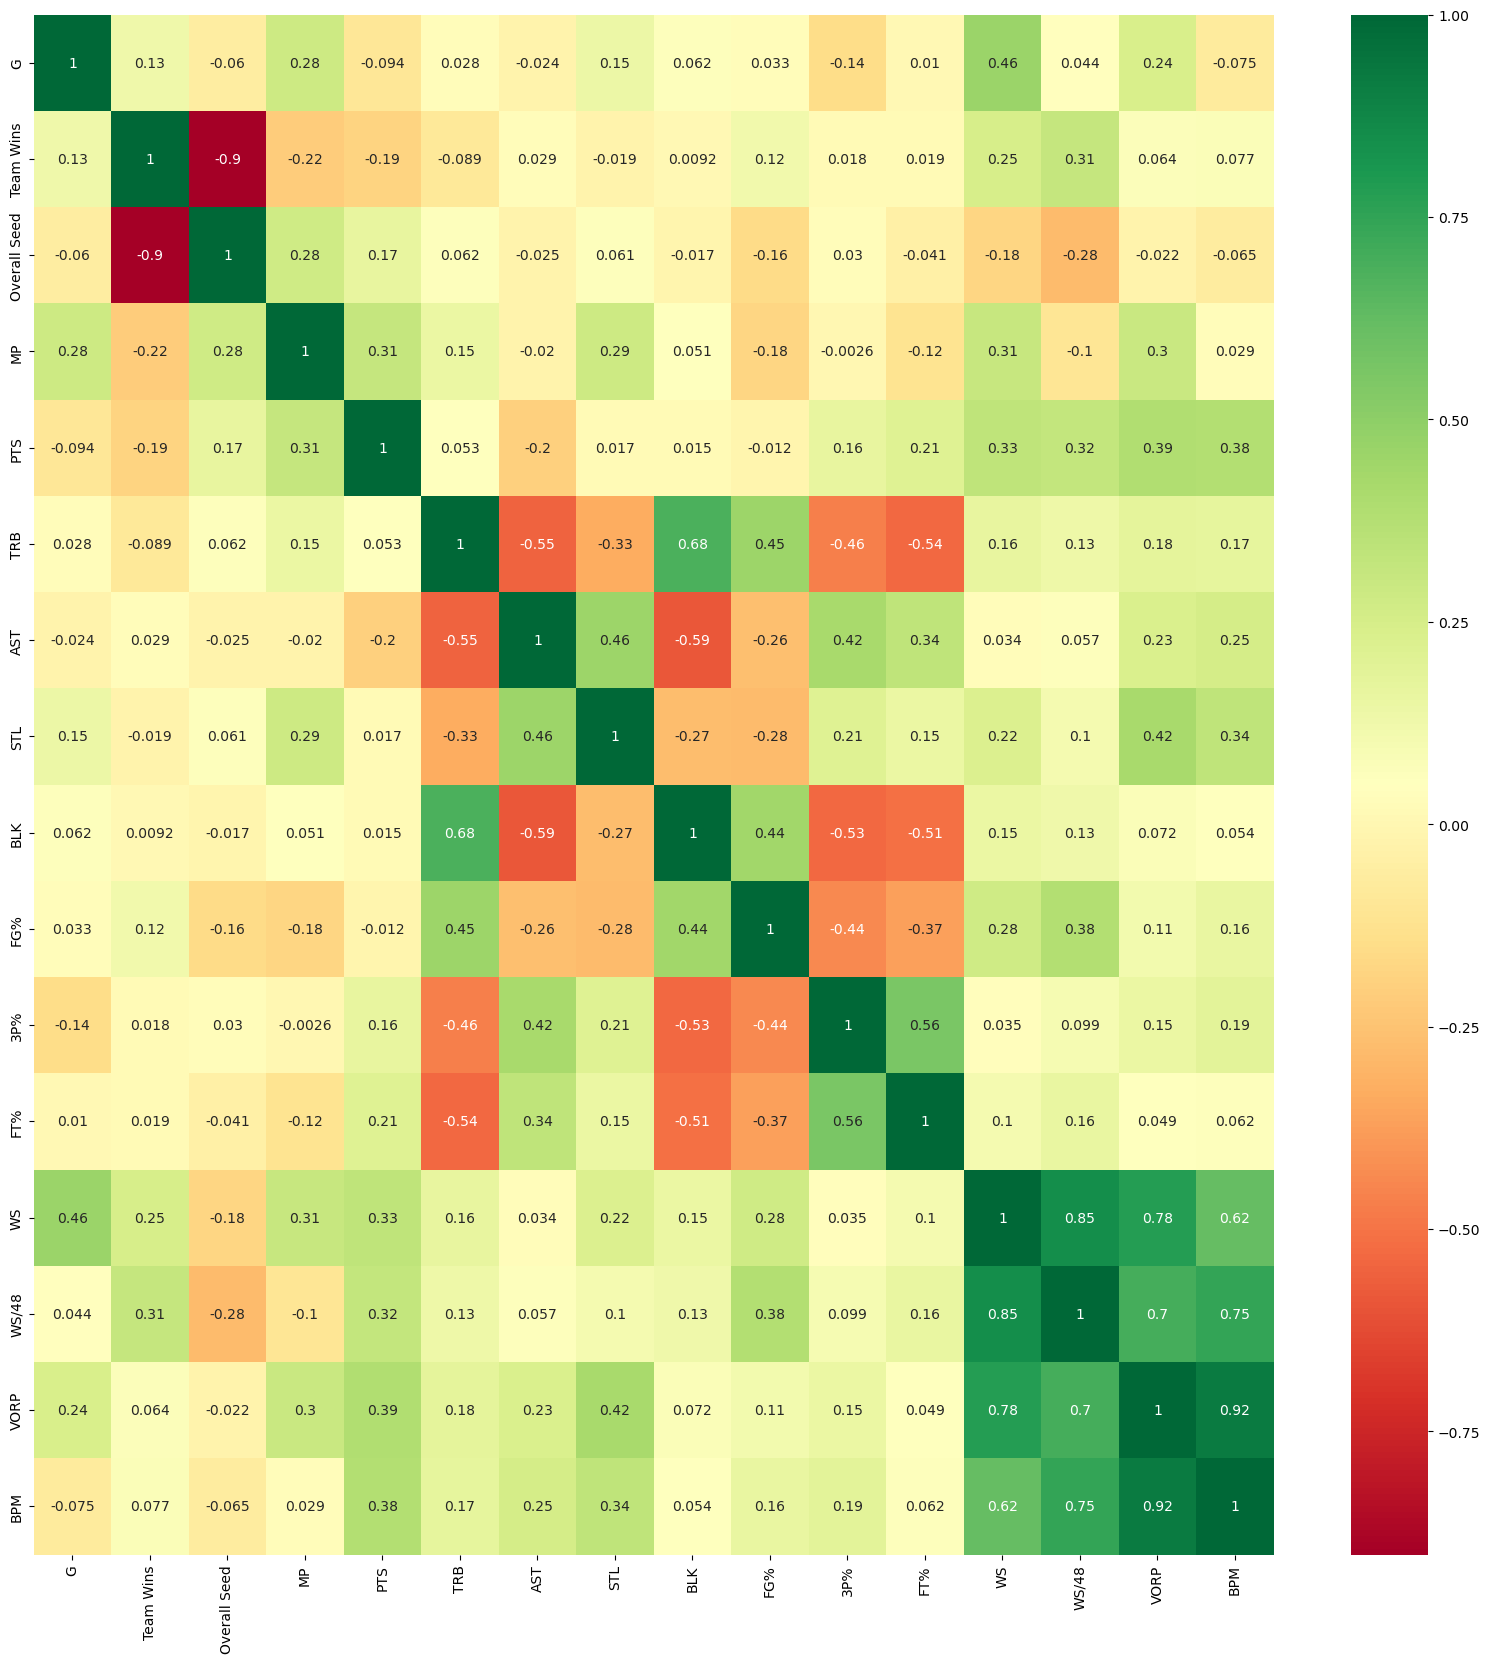

In [4]:
Historical = dfHistorical[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL','BLK', 'FG%', '3P%','FT%', 'WS', 'WS/48', 'VORP', 'BPM']]

fig = plt.figure(figsize=(20, 20))

fig.set_facecolor('white')

sns.heatmap(Historical.corr(), annot=True, cmap="RdYlGn")

plt.savefig("corr_matrix.png")


In [5]:
train, test = train_test_split(dfHistorical, test_size = 0.25, random_state = 10)

xtrain = train[['3P%','BPM', 'BLK', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytrain = train[['Share']]

xtest = test[['3P%','BPM', 'BLK', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]
ytest = test[['Share']]


In [6]:
def scores(y, model):
    
    model.fit(xtrain, ytrain.values.ravel())
    y_pred = model.predict(xtest)
    
    print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred))
    print('R2 score: %.3f' % r2_score(ytest, y_pred))

    cvScore = cross_val_score(model, xtest, ytest.values.ravel(), cv = 3, scoring = 'r2')
    print("R2 cross validation score: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
    
    for i in y_pred:
        y.append(i)


In [7]:
dnn = MLPRegressor(
    solver='lbfgs',
    hidden_layer_sizes=100,
    max_iter=10000,
    random_state=10,
    activation='identity',
    learning_rate ='invscaling')

y_dnn = []

scores(y_dnn, dnn)

Mean squared error: 0.035
R2 score: 0.594
R2 cross validation score: 0.51 (+/- 0.31)


In [8]:
rf = RandomForestRegressor(random_state = 200, n_estimators = 100, criterion = 'squared_error')

y_rf = []

scores(y_rf, rf)


Mean squared error: 0.040
R2 score: 0.541
R2 cross validation score: 0.49 (+/- 0.14)


<BarContainer object of 11 artists>

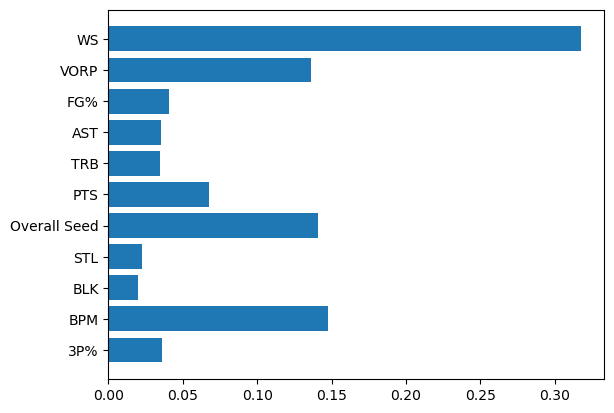

In [9]:
rf.feature_importances_
plt.barh(xtrain.columns, rf.feature_importances_)


In [10]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 11, weights = 'uniform')

y_knn = []

scores(y_knn, knn)


Mean squared error: 0.038
R2 score: 0.567
R2 cross validation score: 0.44 (+/- 0.14)


In [11]:
dfCurrentNames = df_new.iloc[:, 0]
dfCurrentPredict = df_new[['3P%','BPM', 'BLK', 'STL', 'Overall Seed', 'PTS', 'TRB', 'AST', 'FG%', 'VORP', 'WS']]

df_new.head(10)


,Player,Pos,Age,Tm,Team Wins,Overall Seed,G,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Saddiq Bey,SF,24,ATL,24,21,54,42,32.5,4.6,...,6.4,16.4,2.4,0.4,2.9,0.078,0.1,-2.0,-1.9,0.0
15,Dejounte Murray,SG,27,ATL,24,21,52,52,35.0,8.2,...,10.7,25.1,2.0,0.7,2.7,0.073,1.3,-1.0,0.3,1.1
17,Trae Young,PG,25,ATL,24,21,50,50,36.5,8.3,...,15.9,30.5,3.9,0.4,4.3,0.113,5.0,-2.3,2.7,2.2
19,Jaylen Brown,SF,27,BOS,43,1,50,50,33.4,8.5,...,11.5,27.9,1.4,2.4,3.8,0.109,0.2,0.0,0.3,0.9
22,Jrue Holiday,PG,33,BOS,43,1,50,50,33.3,5.0,...,14.4,16.8,2.2,2.3,4.5,0.130,0.8,1.0,1.8,1.6
27,Kristaps Porziņģis,C,28,BOS,43,1,40,40,29.5,6.8,...,9.9,24.8,3.4,2.1,5.5,0.222,3.2,1.6,4.9,2.0
30,Jayson Tatum,PF,25,BOS,43,1,52,52,35.8,9.3,...,10.0,30.1,4.2,3.1,7.3,0.189,4.4,1.0,5.4,3.4
32,Derrick White,SG,29,BOS,43,1,51,51,32.3,5.4,...,11.3,19.2,3.1,2.4,5.5,0.161,1.9,1.4,3.3,2.2
34,Mikal Bridges,SF,27,BRK,21,23,54,54,35.2,7.6,...,10.5,25.8,1.6,1.2,2.8,0.072,1.2,-1.2,0.0,1.0
36,Nic Claxton,C,24,BRK,21,23,44,44,29.4,5.3,...,10.7,15.8,2.3,1.9,4.2,0.157,0.0,1.4,1.4,1.1


In [12]:
dnnPredict = dnn.predict(dfCurrentPredict)
dnnPredict = dnnPredict.tolist()
for (i, j) in zip(dfCurrentNames, dnnPredict):
    print(i, j)

Saddiq Bey -0.8114201402264523
Dejounte Murray -0.5853961371064211
Trae Young -0.25804559080452943
Jaylen Brown -0.14088263374891735
Jrue Holiday -0.22499520117585498
Kristaps Porziņģis -0.10106053346131422
Jayson Tatum 0.2461224366988976
Derrick White -0.1643732901163691
Mikal Bridges -0.6509195338268401
Nic Claxton -0.7847857212489431
Cameron Johnson -0.8758705791569708
DeMar DeRozan -0.40934729012763743
Nikola Vučević -0.5084539149641123
Coby White -0.5145070095667097
Miles Bridges -0.7696094118230881
Brandon Miller -0.9998235795126065
Jarrett Allen -0.15071275273905954
Donovan Mitchell 0.12971371740832577
Max Strus -0.39946166934941957
Luka Dončić 0.3580757854629923
Derrick Jones Jr. -0.7867834361224664
Kentavious Caldwell-Pope -0.632956351987719
Aaron Gordon -0.3815303136394595
Nikola Jokić 0.4839708455371174
Jamal Murray -0.16787172662135813
Michael Porter Jr. -0.37845220300756793
Cade Cunningham -0.7832068099443688
Stephen Curry -0.248816186458583
Klay Thompson -0.72748555389627

In [13]:

dnnListUnsorted = [[i, j] for i, j in zip(dfCurrentNames, dnnPredict)]
dnnDataUnsorted = [row[1] for row in dnnListUnsorted]
dnnList = sorted(dnnListUnsorted, key = itemgetter(1), reverse = True)[:10]

dnnData = [row[1] for row in dnnList]
dnnNames = [row[0] for row in dnnList]
print(dnnList)

x_dnn = np.arange(len(dnnData))


[['Nikola Jokić', 0.4839708455371174], ['Shai Gilgeous-Alexander', 0.36935765736828013], ['Luka Dončić', 0.3580757854629923], ['Giannis Antetokounmpo', 0.3281397670040999], ['Jayson Tatum', 0.2461224366988976], ['Donovan Mitchell', 0.12971371740832577], ['Anthony Edwards', 0.06425425652751343], ['Jalen Brunson', 0.03192395166655565], ['Kevin Durant', 0.004887644797881341], ['Domantas Sabonis', 0.0014633707282034059]]


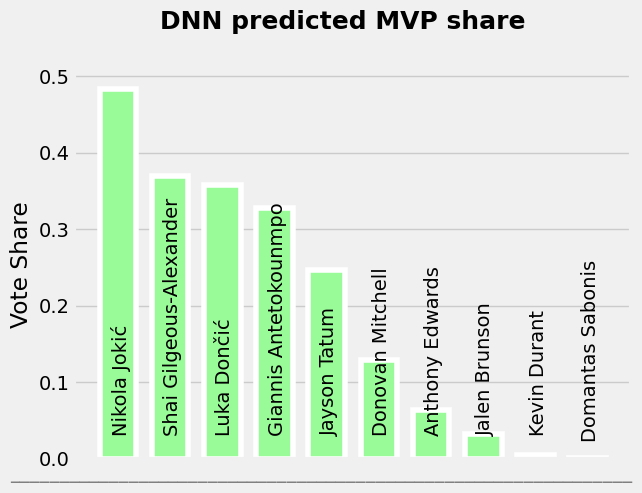

In [14]:
plt.style.use('fivethirtyeight')

dnn, ax = plt.subplots()

ax.bar(x_dnn, dnnData, width = .7, edgecolor = 'white', color = 'palegreen', linewidth = 4, label = 'Predicted')

labels = dnnNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 8:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 8:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
dnn.suptitle("DNN predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

dnn.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')


dnn.savefig('dnn.png', dpi = 400, bbox_inches = 'tight')


In [15]:
rfPredict = rf.predict(dfCurrentPredict)
rfPredict = rfPredict.tolist()

for (i, j) in zip(dfCurrentNames, rfPredict):
    print(i, j)


Saddiq Bey 0.05630999999999996
Dejounte Murray 0.024779999999999976
Trae Young 0.11300999999999994
Jaylen Brown 0.04983999999999998
Jrue Holiday 0.19024999999999995
Kristaps Porziņģis 0.08860000000000003
Jayson Tatum 0.13896999999999993
Derrick White 0.04348999999999997
Mikal Bridges 0.025859999999999984
Nic Claxton 0.06855
Cameron Johnson 0.03391999999999996
DeMar DeRozan 0.03771999999999994
Nikola Vučević 0.03359999999999994
Coby White 0.026629999999999973
Miles Bridges 0.02718999999999998
Brandon Miller 0.04435999999999996
Jarrett Allen 0.06459999999999996
Donovan Mitchell 0.1112
Max Strus 0.05399999999999995
Luka Dončić 0.3122100000000001
Derrick Jones Jr. 0.03430999999999997
Kentavious Caldwell-Pope 0.04314999999999996
Aaron Gordon 0.02642999999999998
Nikola Jokić 0.5322399999999997
Jamal Murray 0.03316999999999999
Michael Porter Jr. 0.03671999999999998
Cade Cunningham 0.027219999999999973
Stephen Curry 0.052859999999999976
Klay Thompson 0.053089999999999964
Dillon Brooks 0.042579

In [16]:
rfListUnsorted = [[i, j] for i, j in zip(dfCurrentNames, rfPredict)]
rfDataUnsorted = [row[1] for row in rfListUnsorted]
rfList = sorted(rfListUnsorted, key = itemgetter(1), reverse = True)[:10]

rfData = [row[1] for row in rfList]
rfNames = [row[0] for row in rfList]
print(rfList)

x_rf = np.arange(len(rfData))


[['Nikola Jokić', 0.5322399999999997], ['Shai Gilgeous-Alexander', 0.4350799999999999], ['Giannis Antetokounmpo', 0.36202999999999996], ['Luka Dončić', 0.3122100000000001], ['Tyrese Haliburton', 0.23326999999999995], ['Mike Conley', 0.20344999999999996], ['Jrue Holiday', 0.19024999999999995], ['Jordan Poole', 0.17954999999999988], ['Malik Beasley', 0.14895999999999993], ['Karl-Anthony Towns', 0.1454799999999999]]


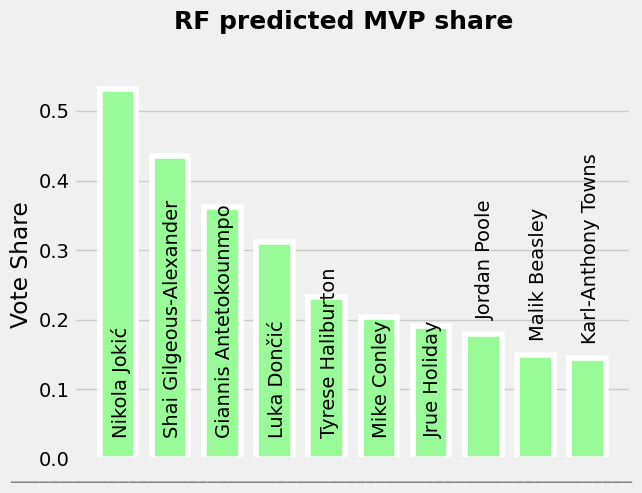

In [17]:
plt.style.use('fivethirtyeight')

rf, ax = plt.subplots()

ax.bar(x_rf, rfData, width = .7, edgecolor = 'white', color = 'palegreen', linewidth = 4, label = 'Predicted')

labels = rfNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 6:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 6:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
rf.suptitle("RF predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

rf.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')


rf.savefig('rf.jpeg', dpi = 400, bbox_inches = 'tight')


In [18]:
knnPredict = knn.predict(dfCurrentPredict)
knnPredict = knnPredict.tolist()

for (i, j) in zip(dfCurrentNames, knnPredict):
    print(i, j)


Saddiq Bey 0.015090909090909094
Dejounte Murray 0.023181818181818182
Trae Young 0.054090909090909085
Jaylen Brown 0.09563636363636364
Jrue Holiday 0.024454545454545455
Kristaps Porziņģis 0.09736363636363636
Jayson Tatum 0.13118181818181818
Derrick White 0.028000000000000004
Mikal Bridges 0.027909090909090915
Nic Claxton 0.039181818181818186
Cameron Johnson 0.016545454545454544
DeMar DeRozan 0.033727272727272724
Nikola Vučević 0.018727272727272728
Coby White 0.025454545454545455
Miles Bridges 0.023545454545454546
Brandon Miller 0.021636363636363634
Jarrett Allen 0.07872727272727274
Donovan Mitchell 0.11190909090909092
Max Strus 0.02036363636363636
Luka Dončić 0.24845454545454543
Derrick Jones Jr. 0.02081818181818182
Kentavious Caldwell-Pope 0.019909090909090908
Aaron Gordon 0.02554545454545455
Nikola Jokić 0.5998181818181818
Jamal Murray 0.024
Michael Porter Jr. 0.06263636363636364
Cade Cunningham 0.02163636363636364
Stephen Curry 0.05445454545454545
Klay Thompson 0.016909090909090912
D

In [19]:
knnListUnsorted = [[i, j] for i, j in zip(dfCurrentNames, knnPredict)]
knnDataUnsorted = [row[1] for row in knnListUnsorted]
knnList = sorted(knnListUnsorted, key = itemgetter(1), reverse = True)[:10]

knnData = [row[1] for row in knnList]
knnNames = [row[0] for row in knnList]
print(knnList)

x_knn = np.arange(len(knnData))


[['Nikola Jokić', 0.5998181818181818], ['Giannis Antetokounmpo', 0.3263636363636364], ['Shai Gilgeous-Alexander', 0.31981818181818183], ['Luka Dončić', 0.24845454545454543], ['Mike Conley', 0.15663636363636363], ['Anthony Edwards', 0.15445454545454546], ['Jayson Tatum', 0.13118181818181818], ['Damian Lillard', 0.11936363636363638], ['Donovan Mitchell', 0.11190909090909092], ['Devin Booker', 0.10254545454545454]]


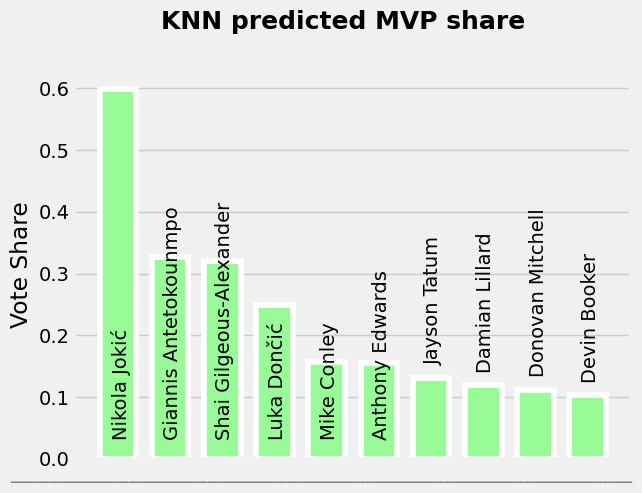

In [20]:
plt.style.use('fivethirtyeight')

knn, ax = plt.subplots()

ax.bar(x_knn, knnData, width = .7, edgecolor = 'white', color = 'palegreen', linewidth = 4, label = 'Predicted')

labels = knnNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 5:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 5:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
knn.suptitle("KNN predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

knn.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')


knn.savefig('knn.jpeg', dpi = 400, bbox_inches = 'tight')


In [21]:
avgPredict = []

for (i, j, h) in zip(rfDataUnsorted, knnDataUnsorted, dnnDataUnsorted):
    avgPredict.append((i + j + h) / 3)

avgList = [[i, j] for i, j in zip(dfCurrentNames, avgPredict)]
avgList = sorted(avgList, key = itemgetter(1), reverse = True)[:10]

avgData = [row[1] for row in avgList]
avgNames = [row[0] for row in avgList]
print(avgList)

x_avg = np.arange(len(avgData))


[['Nikola Jokić', 0.5386763424517663], ['Shai Gilgeous-Alexander', 0.3747519463954873], ['Giannis Antetokounmpo', 0.33884446778924543], ['Luka Dončić', 0.3062467769725126], ['Jayson Tatum', 0.1720914182935719], ['Donovan Mitchell', 0.11760760277247223], ['Anthony Edwards', 0.09735960066068629], ['Tyrese Haliburton', 0.07688501160107436], ['Karl-Anthony Towns', 0.07626055078206534], ['Kevin Durant', 0.06294618462959678]]


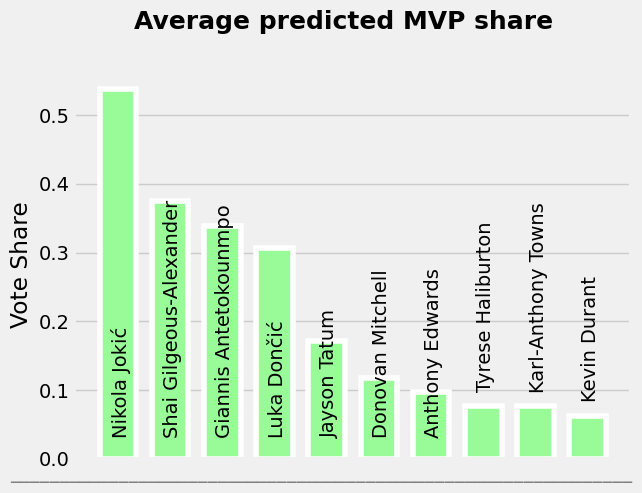

In [22]:
plt.style.use('fivethirtyeight')

avg, ax = plt.subplots()

ax.bar(x_avg, avgData, width = .7, edgecolor = 'white', color = 'palegreen', linewidth = 4, label = 'Predicted')

labels = avgNames

rects = ax.patches
for rect, label in zip(rects, labels):
    if rect.get_x() > 6:
        ax.text(rect.get_x() + rect.get_width() / 1.75, rect.get_height() + .02, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
    elif rect.get_x() <= 6:
        height = .03
        ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
        ha='center', va='bottom', rotation = 'vertical', color = 'black')
        
avg.suptitle("Average predicted MVP share", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Vote Share")

avg.text(x = -0.02, y = 0.03,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')


avg.savefig('avg.jpeg', dpi = 400, bbox_inches = 'tight')
